<a href="https://colab.research.google.com/github/fiqgant/arima-btc/blob/main/ARIMA_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!!pip install pandas numpy statsmodels matplotlib requests

['Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (2.0.3)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (1.25.2)',
 'Requirement already satisfied: statsmodels in /usr/local/lib/python3.10/dist-packages (0.14.2)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (3.7.1)',
 'Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (2.31.0)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas) (2.8.2)',
 'Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas) (2023.4)',
 'Requirement already satisfied: tzdata>=2022.1 in /usr/local/lib/python3.10/dist-packages (from pandas) (2024.1)',
 'Requirement already satisfied: scipy!=1.9.2,>=1.8 in /usr/local/lib/python3.10/dist-packages (from statsmodels) (1.11.4)',
 'Requirement already satisfied: patsy>=0.5.

In [2]:
import pandas as pd

# Load the dataset
url = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1451606400&period2=9999999999&interval=1d&events=history'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   

                Volume  
Date                    
2016-01-01  36278900.0  
2016-01-02  30096600.0  
2016-01-03  39633800.0  
2016-01-04  38477500.0  
2016-01-05  34522600.0  


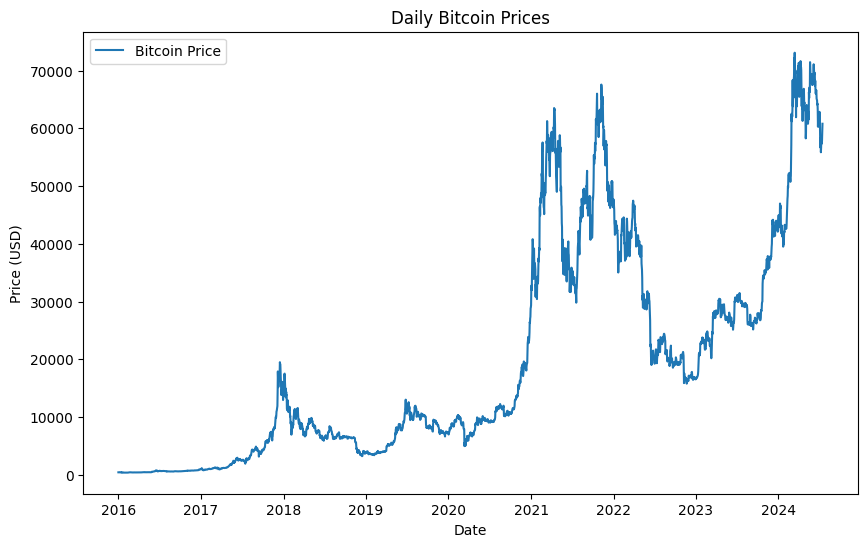

In [3]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Bitcoin Price')
plt.title('Daily Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

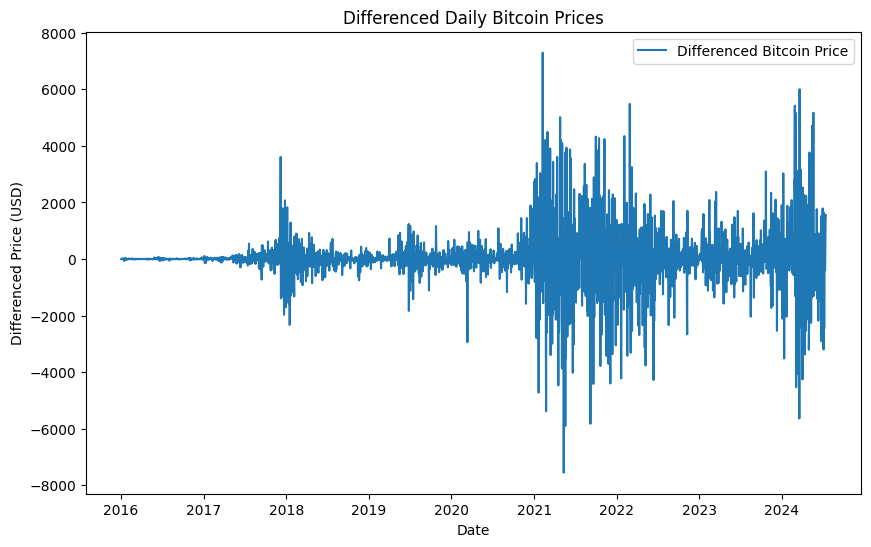

In [4]:
# Perform first-order differencing
data_diff = data['Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Bitcoin Price')
plt.title('Differenced Daily Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price (USD)')
plt.legend()
plt.show()


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['Close'], order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3120
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -25710.140
Date:                Tue, 16 Jul 2024   AIC                          51432.279
Time:                        03:16:46   BIC                          51468.551
Sample:                    01-01-2016   HQIC                         51445.300
                         - 07-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0513      0.010     -5.339      0.000      -0.070      -0.032
ar.L2          0.0122      0.010      1.198      0.231      -0.008       0.032
ar.L3          0.0329      0.011      2.974      0.0

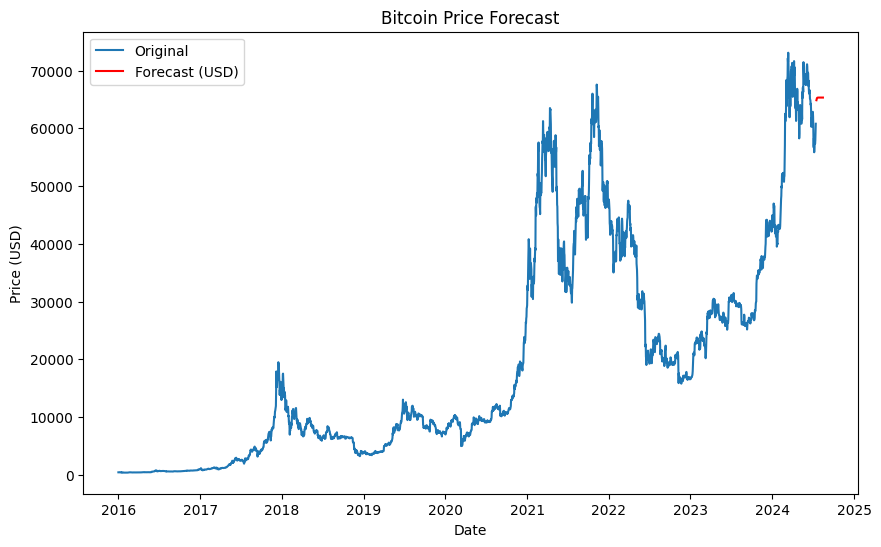

In [6]:
# Make forecast
forecast = model_fit.forecast(steps=30)  # Forecasting for the next 30 days

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Original')
plt.plot(forecast, label='Forecast (USD)', color='red')
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [7]:
import requests

# Function to get USD to IDR exchange rate
def get_usd_to_idr_exchange_rate():
    try:
        response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
        data = response.json()
        return data['rates']['IDR']
    except Exception as e:
        print(f"Error getting exchange rate: {e}")
        return 14500  # Default exchange rate if API fails

# Get the exchange rate
exchange_rate = get_usd_to_idr_exchange_rate()
forecast_idr = forecast * exchange_rate

# Print forecasted values in USD and IDR
print("Forecasted Bitcoin Prices for the next 30 days (USD):")
print(forecast)
print("\nForecasted Bitcoin Prices for the next 30 days (IDR):")
print(forecast_idr)

Forecasted Bitcoin Prices for the next 30 days (USD):
2024-07-17    64857.928145
2024-07-18    65018.188590
2024-07-19    65167.803824
2024-07-20    65261.151784
2024-07-21    65288.089636
2024-07-22    65298.841536
2024-07-23    65308.944573
2024-07-24    65314.532450
2024-07-25    65316.760778
2024-07-26    65317.743490
2024-07-27    65318.393172
2024-07-28    65318.762795
2024-07-29    65318.928459
2024-07-30    65319.006839
2024-07-31    65319.051756
2024-08-01    65319.076660
2024-08-02    65319.088722
2024-08-03    65319.094613
2024-08-04    65319.097798
2024-08-05    65319.099518
2024-08-06    65319.100384
2024-08-07    65319.100816
2024-08-08    65319.101043
2024-08-09    65319.101164
2024-08-10    65319.101226
2024-08-11    65319.101257
2024-08-12    65319.101273
2024-08-13    65319.101282
2024-08-14    65319.101286
2024-08-15    65319.101289
Freq: D, Name: predicted_mean, dtype: float64

Forecasted Bitcoin Prices for the next 30 days (IDR):
2024-07-17    1.050802e+09
2024-07-